In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import datetime

import gym
import trading_env

import os
import agent 
from os import __file__

Loading historical data file


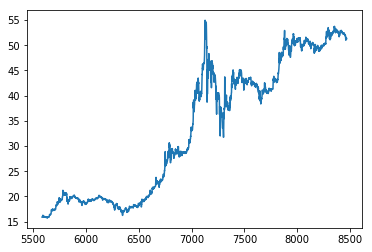

In [2]:
env_trading = gym.make('test_trading-v0')
NUM_EP = 700
date = datetime.datetime(2017, 3, 1, 0, 0)
data = env_trading.historical_data["close"]
env_trading.reset(date=date)
plt.plot(data[env_trading.start_index:env_trading.start_index + int(env_trading.episode_steps) 
              if env_trading.start_index + int(env_trading.episode_steps) < data.shape[0]
             else data.shape[0]])

plt.show()

## The Goal
Have a better cumulated reward and final portfolio value than the three following agents:
- The "holder" (action = 1)
- The "All out" (action = -1)
- The "I have no idea what I am doing" (random action)


# Holder

In [3]:
state = env_trading.reset(date=date)
total_reward = 0

while(True):
    action = 1.0 #Holder agent
    state, reward, done, _ = env_trading.step(action)
    total_reward += reward
    if done:
        break
holder_reward = np.full(NUM_EP, total_reward)

# Random

In [4]:
state = env_trading.reset(date=date)
total_reward = 0

while(True):
    action = env_trading.action_space.sample()
    state, reward, done, _ = env_trading.step(action)
    total_reward += reward
    if done:  
        break
random_reward = np.full(NUM_EP, total_reward)

# All out

In [5]:
out_reward = np.full(NUM_EP, 0)

# The Agent

In [6]:
agent = agent.StochasticPolicyGradientAgent(env_trading, learning_rate = 1e-3, discount_rate = 1.0)

In [7]:
rewards_plot = []
portfolio = []
for i in range(NUM_EP):
    state = env_trading.reset(date=date)
    state = np.reshape(state,200)
    total_reward = 0
    
    while(True):
        action = agent.act([state])
        state, reward, done, _ = env_trading.step(action)
        state = np.reshape(state,200)
        agent.store_step(action, state, reward)
        total_reward += reward
        if done:
            rewards_plot.append(total_reward)
            portfolio.append(env_trading.portfolio_value)
            print("Episode: {}, Total reward: {}".format(i,total_reward))
            break
    agent.train()


Episode: 0, Total reward: 0.6196722019835414
Episode: 1, Total reward: 1.4114724454633243
Episode: 2, Total reward: 1.359373274429234
Episode: 3, Total reward: 1.3717787779595423
Episode: 4, Total reward: 1.3579106265162677
Episode: 5, Total reward: 1.374122139187762
Episode: 6, Total reward: 1.3879728875942112
Episode: 7, Total reward: 1.3946637816002714
Episode: 8, Total reward: 1.3725027411238035
Episode: 9, Total reward: 1.36013169681678
Episode: 10, Total reward: 1.3543116774180104
Episode: 11, Total reward: 1.3533075605619465
Episode: 12, Total reward: 1.356930798715903
Episode: 13, Total reward: 1.3387032168266115
Episode: 14, Total reward: 1.3170801330225403
Episode: 15, Total reward: 1.3694594664390454
Episode: 16, Total reward: 1.3798405820386572
Episode: 17, Total reward: 1.3173785677852912
Episode: 18, Total reward: 1.3364555249998968
Episode: 19, Total reward: 1.3961095869036846
Episode: 20, Total reward: 1.3453855108939996
Episode: 21, Total reward: 1.3553309776590217
Epi

Episode: 178, Total reward: 1.34950045861597
Episode: 179, Total reward: 1.3767948610668248
Episode: 180, Total reward: 1.4004813726079612
Episode: 181, Total reward: 1.3693771330142488
Episode: 182, Total reward: 1.2992190607071663
Episode: 183, Total reward: 1.361743206746457
Episode: 184, Total reward: 1.353965726902508
Episode: 185, Total reward: 1.3985739403556519
Episode: 186, Total reward: 1.347746428630688
Episode: 187, Total reward: 1.3835200966061698
Episode: 188, Total reward: 1.3688528841950618
Episode: 189, Total reward: 1.3792023177730546
Episode: 190, Total reward: 1.3738456686157854
Episode: 191, Total reward: 1.3919716319954023
Episode: 192, Total reward: 1.334055432298308
Episode: 193, Total reward: 1.3583340649694515
Episode: 194, Total reward: 1.351193518282409
Episode: 195, Total reward: 1.3575722750404167
Episode: 196, Total reward: 1.3770277268885223
Episode: 197, Total reward: 1.367088318879056
Episode: 198, Total reward: 1.3836809533958399
Episode: 199, Total r

KeyboardInterrupt: 

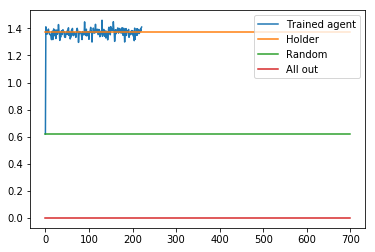

In [8]:
plt.plot(rewards_plot, label = "Trained agent")
plt.plot(holder_reward, label = "Holder")
plt.plot(random_reward, label = "Random")
plt.plot(out_reward, label = "All out")
plt.legend()
plt.show()